In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt



In [47]:
df=pd.read_csv('../../vente_car_bi_hatem.csv',delimiter=';')


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364109 entries, 0 to 364108
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ANCSCP  364109 non-null  int64 
 1   NOMCLI  364109 non-null  object
 2   DATLIV  364109 non-null  object
 3   LIBGVR  364109 non-null  object
 4   LIBLOC  364109 non-null  object
 5   LIBPRD  364109 non-null  object
 6   QTEPRD  364106 non-null  object
 7   MNTHT   364106 non-null  object
dtypes: int64(1), object(7)
memory usage: 22.2+ MB


In [49]:
df.head()

,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT
0,5452,SADOK BEN SALHA ...,02/01/2017,NABEUL,MENZEL TEMIME,PETROLE,4,"2737,5"
1,5452,SADOK BEN SALHA ...,02/01/2017,NABEUL,MENZEL TEMIME,GASOIL,12,"11617,5"
2,5452,SADOK BEN SALHA ...,02/01/2017,NABEUL,MENZEL TEMIME,TIMBRE LOI 54 du 19/08/2014,1,0
3,5452,SADOK BEN SALHA ...,20/03/2017,NABEUL,MENZEL TEMIME,TIMBRE LOI 54 du 19/08/2014,1,0
4,5452,SADOK BEN SALHA ...,05/01/2017,NABEUL,MENZEL TEMIME,GASOIL 50,8,"9732,144"


# 1-Data Prep

### 1.1 Remove negative values

In [50]:


df['QTEPRD']=df['QTEPRD'].str.replace(',','.')

df['QTEPRD']=pd.to_numeric(df['QTEPRD'],errors='raise')


In [51]:
df['MNTHT']=df['MNTHT'].str.replace(',','.')

df['MNTHT']=pd.to_numeric(df['MNTHT'],errors='raise')


In [52]:
df=df[df['MNTHT']>0]

In [53]:
df=df[df['QTEPRD']>0]

In [54]:
df.loc[df["LIBPRD"] == "AGILIX PREMIUM ESSENCE", "LIBPRD"] = "APS AGILIX PREMIUM ESS."
df.loc[df["LIBPRD"] == "AGILIX PREMIUM GASOIL", "LIBPRD"] = "APG AGILIX PREMIUM GAS."
valeurs_a_supprimer = ["B.T.S", "PETROLE BUTIMES", "FOL", "WHITE SPIRIT","PETROLE"]



df = df[~df["LIBPRD"].isin(valeurs_a_supprimer)]

#### Add price column

In [55]:
df = df.assign(
    prixHT=lambda x: x.apply(
        lambda row: 0 if row['MNTHT'] < 0 or row['QTEPRD'] == 0 else row['MNTHT'] / row['QTEPRD'], 
        axis=1
    )
)

### 1.2 Null values

In [56]:
df.isnull().values.any()


False

### 1.3 Duplicates Values

In [57]:
df=df.drop_duplicates()
print("Shape of dataset after removing duplicates:",df.shape)

Shape of dataset after removing duplicates: (232111, 9)


In [58]:
df=df.drop(columns='NOMCLI')

### transform date column for further vizualisation

In [68]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Year'] = df['DATLIV'].dt.year
df['Month'] = df['DATLIV'].dt.month
df['Day'] = df['DATLIV'].dt.day
df['Weekday'] = df['DATLIV'].dt.weekday
df['Quarter'] = df['DATLIV'].dt.quarter
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df

,ANCSCP,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT,prixHT,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos,Duration,duration_delivery
135399,5030,2018-07-01,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,6796.976,1699.244,2018,7,1,6,3,-5.000000e-01,-8.660254e-01,0.201299,0.979530,0,0
135976,5030,2018-07-16,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,3.0,5097.732,1699.244,2018,7,16,0,3,-5.000000e-01,-8.660254e-01,-0.101168,-0.994869,15,15
136048,5030,2018-07-30,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,6796.976,1699.244,2018,7,30,0,3,-5.000000e-01,-8.660254e-01,-0.201299,0.979530,14,14
136561,5030,2018-08-28,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,6796.976,1699.244,2018,8,28,1,3,-8.660254e-01,-5.000000e-01,-0.571268,0.820763,29,29
137744,5030,2018-09-08,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,3.0,5248.992,1749.664,2018,9,8,5,3,-1.000000e+00,-1.836970e-16,0.998717,-0.050649,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105919,5597,2019-11-29,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,7.0,11681.173,1668.739,2019,11,29,4,4,-5.000000e-01,8.660254e-01,-0.394356,0.918958,7,7
105962,5597,2019-12-11,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,2.0,3337.478,1668.739,2019,12,11,2,4,-2.449294e-16,1.000000e+00,0.790776,-0.612106,12,12
105968,5597,2019-12-16,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,4.0,6674.956,1668.739,2019,12,16,0,4,-2.449294e-16,1.000000e+00,-0.101168,-0.994869,5,5
105941,5597,2019-12-20,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,3.0,5006.217,1668.739,2019,12,20,4,4,-2.449294e-16,1.000000e+00,-0.790776,-0.612106,4,4


In [60]:
df['Weekday'].value_counts()

Weekday
5    47340
0    39254
4    36383
2    35267
1    34954
3    34411
6     4502
Name: count, dtype: int64

### 1.4 Data vizualisation

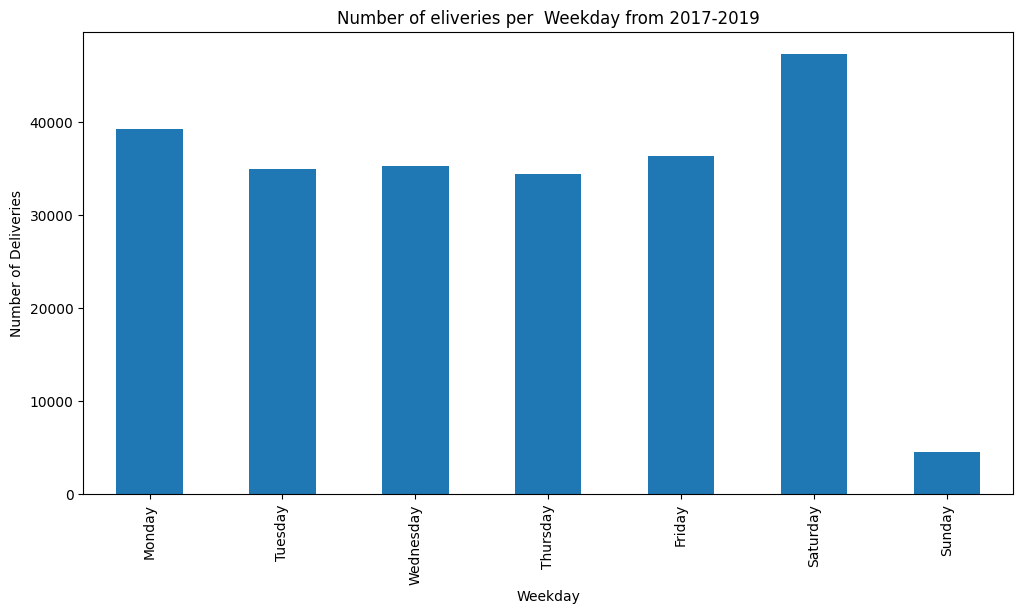

In [61]:
weekday_counts = df['Weekday'].value_counts().sort_index()

# Create a list of weekday names
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar chart
plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar')
plt.xticks(range(len(weekdays)), weekdays)
plt.xlabel('Weekday')
plt.ylabel('Number of Deliveries')
plt.title('Number of eliveries per  Weekday from 2017-2019')
plt.show()

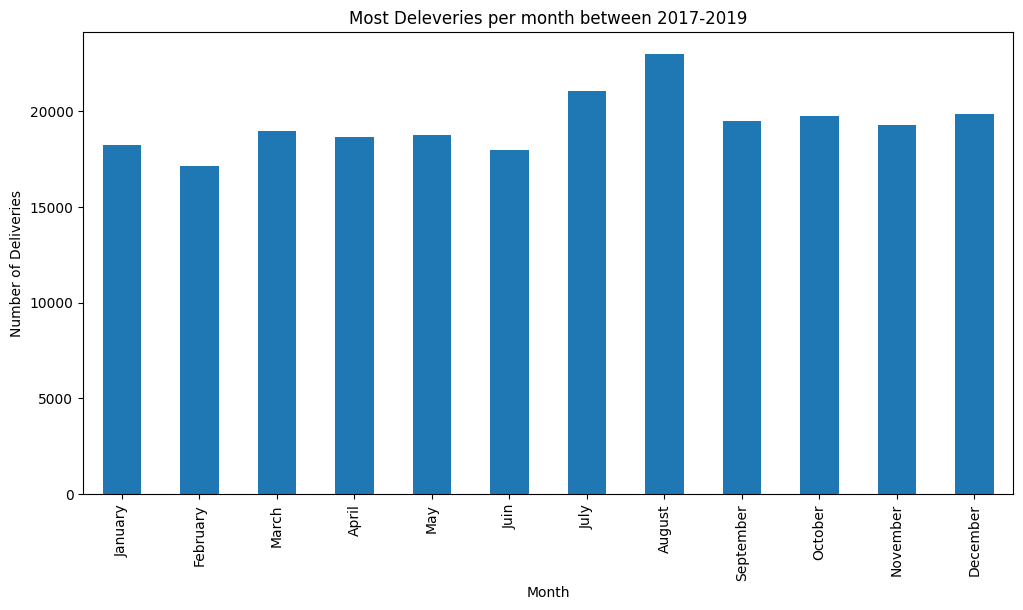

In [62]:
weekday_counts = df['Month'].value_counts().sort_index()

# Create a list of weekday names
months = ['January', 'February', 'March', 'April', 'May', 'Juin', 'July','August','September','October','November','December']

# Create the bar chart
plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar')
plt.xticks(range(len(months)), months)
plt.xlabel('Month')
plt.ylabel('Number of Deliveries')
plt.title('Most Deleveries per month between 2017-2019')
plt.show()

# 2- Data Preparation

#### 2.1 Define the outliers

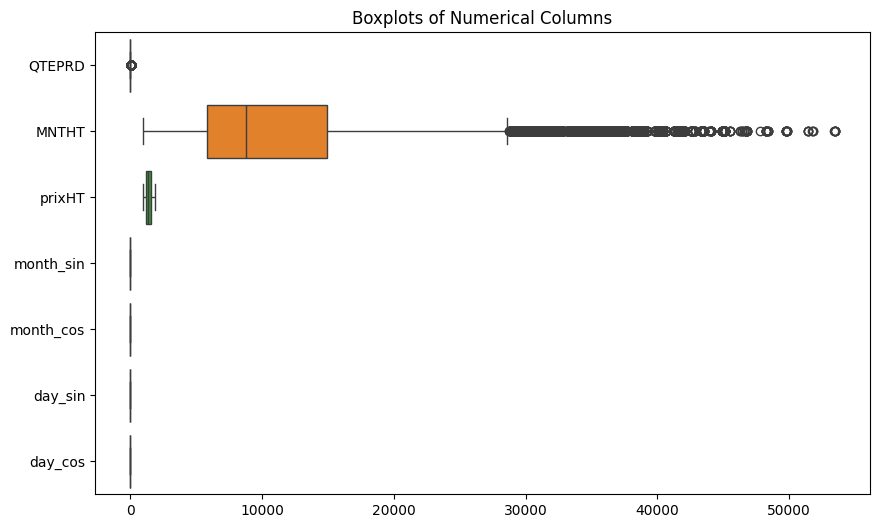

In [63]:
import seaborn as sns


numerical_columns = df.select_dtypes(include=['float64']).columns
# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

In [64]:
# Sélectionner les colonnes numériques
numerical_columns = df.select_dtypes(include=['float64']).columns

# Initialiser un DataFrame pour stocker les outliers
outliers = pd.DataFrame()

# Parcourir chaque colonne numérique
for col in numerical_columns:
    # Calculer le 1er et le 3e quartile (Q1 et Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculer l'IQR
    IQR = Q3 - Q1
    
    # Définir les bornes pour les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les lignes avec des valeurs aberrantes
    outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Ajouter ces lignes au DataFrame des outliers
    outliers = pd.concat([outliers, outliers_col])

# Afficher les lignes contenant des outliers
outliers.drop_duplicates(inplace=True)  # Supprimer les doublons si une ligne est outlier dans plusieurs colonnes
outliers.head()

,ANCSCP,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT,prixHT,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
27,5452,2017-01-26,NABEUL,MENZEL TEMIME,GASOIL,22.0,21298.750,968.125,2017,1,26,3,1,0.500000,0.866025,-0.848644,0.528964
63,5452,2017-01-24,NABEUL,MENZEL TEMIME,GASOIL,24.0,23235.000,968.125,2017,1,24,1,1,0.500000,0.866025,-0.988468,0.151428
99,5452,2017-02-01,NABEUL,MENZEL TEMIME,GASOIL,28.0,27107.500,968.125,2017,2,1,2,1,0.866025,0.500000,0.201299,0.979530
102,5452,2017-02-16,NABEUL,MENZEL TEMIME,GASOIL,23.0,22266.875,968.125,2017,2,16,3,1,0.866025,0.500000,-0.101168,-0.994869
136,5452,2017-02-27,NABEUL,MENZEL TEMIME,GASOIL,22.0,21298.750,968.125,2017,2,27,0,1,0.866025,0.500000,-0.724793,0.688967


In [65]:
df = df.sort_values(by=['ANCSCP', 'LIBGVR', 'LIBLOC','LIBPRD','DATLIV'])


### 2.2 Feature engineering

#### add next_call_days feature

In [76]:
df['next_call'] = df.groupby(['ANCSCP', 'LIBGVR', 'LIBLOC', 'LIBPRD'])['DATLIV'].shift(-1)

# Calculer la différence entre la date actuelle et la prochaine livraison
df['next_call'] = (df['next_call'] - df['DATLIV']).dt.days

# Remplacer les NaN par 0 (cela signifie que c'était la dernière livraison pour ce groupe)


#### add last quantity delivered

In [69]:
df['last_qauntity_delivered'] = df.groupby(['ANCSCP','LIBPRD','LIBLOC'])['QTEPRD'].shift(1)


In [83]:
df=df.drop(columns='QTEPRD')
df=df.drop(columns='Duration')
df=df.drop(columns='duration_delivery')
df=df.drop(columns='MNTHT')

In [85]:
df['last_qauntity_delivered'].fillna(0, inplace=True)
df['next_call'].fillna(0, inplace=True)


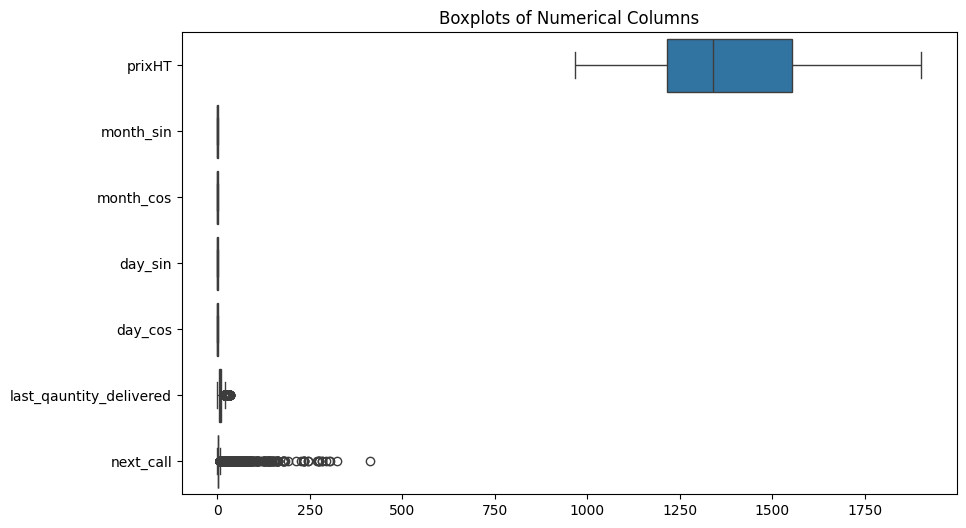

In [150]:
numerical_columns = df.select_dtypes(include=['float64']).columns
# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

In [152]:
Q1 = df['next_call'].quantile(0.25)
Q3 = df['next_call'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les lignes qui sont dans les bornes (sans outliers)
df = df[(df['next_call'] >= lower_bound) & (df['next_call'] <= upper_bound)]

# Vérifier le résultat
df[['next_call']].describe()

,next_call
count,216029.000000
mean,2.286295
std,1.372394
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


In [200]:
Q1 = df['last_qauntity_delivered'].quantile(0.25)
Q3 = df['last_qauntity_delivered'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les lignes qui sont dans les bornes (sans outliers)
df = df[(df['last_qauntity_delivered'] >= lower_bound) & (df['last_qauntity_delivered'] <= upper_bound)]

# Vérifier le résultat


,last_qauntity_delivered
count,210976.000000
mean,8.331838
std,5.385374
min,0.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,24.000000


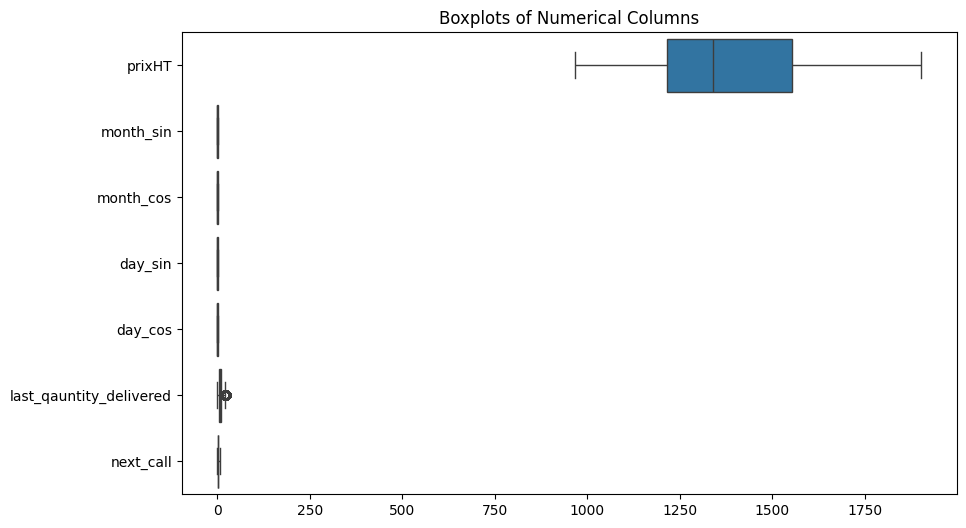

In [240]:
numerical_columns = df.select_dtypes(include=['float64']).columns
# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

In [238]:
df.to_csv('df_bo2.csv')

#### Data in case of classfication

In [89]:
df_classf=df
df_classf=df_classf.drop(columns='next_call')

df_classf['target'] = 1

In [93]:
df_classf['DATLIV'] = pd.to_datetime(df_classf['DATLIV'])

# Créer une liste pour stocker les nouvelles lignes avec les dates manquantes
missing_rows = []

# Identifier les colonnes de regroupement
group_columns = ['ANCSCP', 'LIBGVR', 'LIBLOC', 'LIBPRD','prixHT']

# Parcourir chaque groupe
for name, group in df_classf.groupby(group_columns):
    # Créer une plage de dates complète entre la première et la dernière date
    full_date_range = pd.date_range(start=group['DATLIV'].min(), end=group['DATLIV'].max(), freq='D')
    
    # Identifier les dates manquantes en comparant avec les dates de livraison actuelles
    missing_dates = full_date_range.difference(group['DATLIV'])
    
    # Pour chaque date manquante, créer une nouvelle ligne
    for missing_date in missing_dates:
        # Construire un dictionnaire pour la nouvelle ligne
        new_row = {col: name[idx] for idx, col in enumerate(group_columns)}
        new_row['DATLIV'] = missing_date
        new_row['target'] = 0
        
        # Ajouter cette ligne à la liste
        missing_rows.append(new_row)

# Créer un DataFrame à partir des lignes manquantes
df_missing = pd.DataFrame(missing_rows)

# Concaténer les nouvelles lignes avec le DataFrame original
df_classf = pd.concat([df_classf, df_missing], ignore_index=True)

# Trier à nouveau les données par les colonnes pertinentes, y compris DATLIV
df_classf = df_classf.sort_values(by=group_columns + ['DATLIV'])



In [96]:
df_classf['Year'] = df_classf['DATLIV'].dt.year
df_classf['Month'] = df_classf['DATLIV'].dt.month
df_classf['Day'] = df_classf['DATLIV'].dt.day
df_classf['Weekday'] = df_classf['DATLIV'].dt.weekday
df_classf['Quarter'] = df_classf['DATLIV'].dt.quarter
df_classf['month_sin'] = np.sin(2 * np.pi * df_classf['Month'] / 12)
df_classf['month_cos'] = np.cos(2 * np.pi * df_classf['Month'] / 12)
df_classf['day_sin'] = np.sin(2 * np.pi * df_classf['Day'] / 31)
df_classf['day_cos'] = np.cos(2 * np.pi * df_classf['Day'] / 31)


<class 'pandas.core.frame.DataFrame'>
Index: 1420787 entries, 0 to 706264
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   ANCSCP                   1420787 non-null  int64         
 1   DATLIV                   1420787 non-null  datetime64[ns]
 2   LIBGVR                   1420787 non-null  object        
 3   LIBLOC                   1420787 non-null  object        
 4   LIBPRD                   1420787 non-null  object        
 5   prixHT                   946632 non-null   float64       
 6   Year                     1420787 non-null  int32         
 7   Month                    1420787 non-null  int32         
 8   Day                      1420787 non-null  int32         
 9   Weekday                  1420787 non-null  int32         
 10  Quarter                  1420787 non-null  int32         
 11  month_sin                1420787 non-null  float64       
 12  month_

### 2.3 Data transformation

In [201]:
categorical_columns = ['LIBPRD','LIBGVR','LIBLOC']
# Appliquer l'encodage one-hot
df_transformed = pd.get_dummies(df, columns=categorical_columns)


In [202]:
df_transformed[df_transformed.select_dtypes(include='bool').columns] = df_transformed.select_dtypes(include='bool').astype(int)


In [203]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
 

numeric_data = df_transformed.select_dtypes(include=['number'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numeric columns
df_scaled = scaler.fit_transform(numeric_data)

# Convert the normalized array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_data.columns)


In [204]:
import joblib
joblib.dump(scaler, '../../deployML/notebooks/scaler_bo2.pkl')


['../../deployML/notebooks/scaler_bo2.pkl']

In [205]:
df_inverted=scaler.inverse_transform(df_scaled)
df_inverted=pd.DataFrame(df_inverted,columns=df_scaled.columns)


In [206]:
columns = [col for col in df_scaled.columns if col != 'next_call'] + ['next_call']
df_scaled = df_scaled[columns]
columns = [col for col in df_inverted.columns if col != 'next_call'] + ['next_call']
df_inverted = df_inverted[columns]

In [255]:
df_inverted['DATLIV']

KeyError: 'DATLIV'

# 3- Modeling



### 3.1 XGboost      

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.utils import shuffle


In [209]:
from sklearn.utils import shuffle

# Shuffle both DataFrames with the same random state
df_scaled_shuffled, df_inverted_shuffled = shuffle(df_scaled, df_inverted, random_state=42)

In [210]:

x = df_scaled_shuffled.drop(columns=['next_call'])
y = df_scaled_shuffled['next_call']


In [211]:
X_inverted = df_inverted_shuffled.drop(columns=['next_call'])
Y_inverted= df_inverted_shuffled['next_call']


In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [213]:
X_inverted_train, X_inverted_test, Y_inverted_train, Y_inverted_test = train_test_split(X_inverted, Y_inverted, test_size=0.2, random_state=42)


In [214]:
model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, random_state=42)
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [215]:
y_pred_train= model_xgb.predict(x_train)
y_pred_train = pd.Series(y_pred_train, name='next_call')
y_pred_train.index = x_train.index


In [216]:
df_target=pd.concat([y_train,y_pred_train,Y_inverted_train],axis=1)
df_target.columns=['y_train','y_pred_train','Y_inverted_train']
df_target.head()

,y_train,y_pred_train,Y_inverted_train
81008,0.666667,0.594789,4.0
41745,0.500000,0.367920,3.0
23233,0.333333,0.374148,2.0
178230,0.166667,0.213741,1.0
166320,0.666667,0.616096,4.0


In [217]:
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.1457940247078731


In [218]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_model_train=r2_score(y_train, y_pred_train)
r2_model_train

0.5931732831125849

In [219]:
y_pred = model_xgb.predict(x_test)
y_pred = pd.Series(y_pred, name='next_call')
y_pred.index = x_test.index


In [220]:
df_target_test=pd.concat([y_test,y_pred,Y_inverted_test],axis=1)
df_target_test.columns=['y_test','y_pred_test','Y_inverted_test']
df_target_test.head()

,y_test,y_pred_test,Y_inverted_test
76118,0.666667,0.564659,4.0
76070,0.833333,0.651784,5.0
70333,1.000000,0.681114,6.0
108663,0.500000,0.544859,3.0
103061,0.166667,0.473019,1.0


In [221]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.15720069621838534


In [222]:
r2_model_test = r2_score(y_test, y_pred)
r2_model_test

0.5262585557679

In [223]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 1000}


In [224]:
best_model = XGBRegressor(objective ='reg:squarederror', 
                              n_estimators=best_params['n_estimators'], 
                              learning_rate=best_params['learning_rate'], 
                              max_depth=best_params['max_depth'], 
                              min_child_weight=best_params['min_child_weight'])

best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [254]:
from joblib import dump
dump(best_model,'../../deployML/notebooks/model_bo2.joblib')


['../../deployML/notebooks/model_bo2.joblib']

In [225]:
y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error with best parameters: {mse_best}")

Mean Squared Error with best parameters: 0.021868966293683987


In [226]:
r2_model_test_best = r2_score(y_test, y_pred_best)
r2_model_test_best

0.5807619380764104

In [227]:
y_pred_best = best_model.predict(x_test)
y_pred_best = pd.Series(y_pred_best, name='next_call')
y_pred_best.index = x_test.index

In [228]:
df_target_test_xgb=pd.concat([y_test,y_pred_best,Y_inverted_test],axis=1)
df_target_test_xgb.columns=['y_test','y_pred_best','Y_inverted_test']
df_target_test_xgb.head()

,y_test,y_pred_best,Y_inverted_test
76118,0.666667,0.648370,4.0
76070,0.833333,0.758915,5.0
70333,1.000000,0.774357,6.0
108663,0.500000,0.523200,3.0
103061,0.166667,0.430525,1.0


#### 3.2 LightGBM

In [229]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42)
model_lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 168780, number of used features: 216
[LightGBM] [Info] Start training from score 0.381897


In [230]:
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print(f"RMSE: {rmse_lgbm}")

RMSE: 0.14866217902075685


In [231]:
mae_model3 = mean_absolute_error(y_test, y_pred_lgbm)
r2_model3 = r2_score(y_test, y_pred_lgbm)
r2_model3

0.5763244149681875

In [232]:
y_pred_lgbm = pd.Series(y_pred_lgbm, name='next_call')
y_pred_lgbm.index = x_test.index
df_target_test_lgbm=pd.concat([y_test,y_pred_lgbm,Y_inverted_test],axis=1)
df_target_test_lgbm.columns=['y_test','y_pred_lgbm','Y_inverted_test']


In [233]:
df_target_test_lgbm['y_pred_lgbm_inverted'] = (df_target_test_lgbm['y_pred_lgbm'] * df_target_test_lgbm['Y_inverted_test']) / df_target_test_lgbm['y_test']



In [234]:
df_target_test_lgbm['y_pred_lgbm_inverted'] = (df_target_test_lgbm['y_pred_lgbm'] * df_target_test_lgbm['Y_inverted_test']) / df_target_test_lgbm['y_test']

df_combined_lgbm = pd.concat([X_inverted_test, df_target_test_lgbm], axis=1)
df_combined_lgbm['Date'] = df_combined_lgbm['Year'].astype(str) + '-' + df_combined_lgbm['Month'].astype(str).str.zfill(2) + '-' + df_combined_lgbm['Day'].astype(str).str.zfill(2)
df_combined_lgbm['Date'] = pd.to_datetime(df_combined_lgbm[['Year', 'Month', 'Day']])
df_combined_lgbm['y_pred_lgbm_inverted'] = df_combined_lgbm['y_pred_lgbm_inverted'].round()



## Visualisation of XGboost model Prediction

In [244]:
df_target_test_xgb['y_pred_best_inverted'] = (df_target_test_xgb['y_pred_best'] * df_target_test_xgb['Y_inverted_test']) / df_target_test_xgb['y_test']

df_combined_xgb = pd.concat([X_inverted_test, df_target_test_xgb], axis=1)
df_combined_xgb['Date'] = df_combined_xgb['Year'].astype(str) + '-' + df_combined_xgb['Month'].astype(str).str.zfill(2) + '-' + df_combined_xgb['Day'].astype(str).str.zfill(2)
df_combined_xgb['Date'] = pd.to_datetime(df_combined_xgb[['Year', 'Month', 'Day']])
df_combined_xgb['y_pred_best_inverted'] = df_combined_xgb['y_pred_best_inverted'].round()
df_combined_xgb['ANCSCP'].value_counts()


ANCSCP
5479.0    727
5450.0    621
5356.0    586
5399.0    572
5513.0    554
         ... 
5518.0      3
5069.0      1
5496.0      1
5368.0      1
5501.0      1
Name: count, Length: 219, dtype: int64

In [253]:
import plotly.express as px
import plotly.graph_objects as go
df_STE_DE_GESTION = df_combined_xgb[df_combined_xgb['ANCSCP'] == 5530.0]
df_2017 = df_STE_DE_GESTION[df_STE_DE_GESTION['Date'].dt.year == 2019]

fig = px.line()
fig = go.Figure(fig)
df_2017 = df_2017.sort_values(by="Date")


fig.add_trace(go.Scatter(x=df_2017['Date'], y=df_2017['y_pred_best_inverted'], 
                         mode='lines', name='prediction of next call    in 2019', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_2017['Date'], y=df_2017['Y_inverted_test'], 
                         mode='lines', name='test of next call  in 2019', line=dict(color='blue')))
fig.show()


In [250]:
df_STE_DE_GESTION.columns

Index(['ANCSCP', 'prixHT', 'Year', 'Month', 'Day', 'Weekday', 'Quarter',
       'month_sin', 'month_cos', 'day_sin',
       ...
       'LIBLOC_TOZGRANE', 'LIBLOC_TUNIS VILLE', 'LIBLOC_ZAGHOUAN',
       'LIBLOC_ZARZIS', 'LIBLOC_ZARZOUNA', 'y_test', 'y_pred_best',
       'Y_inverted_test', 'y_pred_best_inverted', 'Date'],
      dtype='object', length=231)